## TASK 2

#### Problem Case: 

Develop a Loan Eligibility Prediction Model for Bank ABC to save time and cost on decision making

**Parts:**

1. Data Collection
2. Data Preparation
3. Data Split (Already given)
4. Data Visualization
5. ML modelling
6. Model performance evaluation
7. Tuning hyper parameters

### 1. Data Collection

In [1]:
# import all required libraries

import pandas as pd
import numpy as np


In [2]:
# For the sake of this task, we would call training data, "data1" and test data, "data2"

data1 = pd.read_csv("C:/Users/MY PC/Desktop/ASSIGNMENTS/ML - January 13th 2023/LoanDatasets.csv")
data2 = pd.read_csv("C:/Users/MY PC/Desktop/ASSIGNMENTS/ML - January 13th 2023/LoanDataset_test.csv")

# View the top 5 rows to have a brief overview of the dataset
data1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


 ### 2. Data Preparation

To be prepare the data, I'd have to Understand the data better by using the "describe","shape","isna", and "info" methods of pandas

In [3]:
# Identifying the number of rows and columns in our data

data1.shape

(631, 13)

In [4]:
# Understanding the statistical distribution of our data

data1.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,631.000000,631.000000,608.000000,617.000000,580.000000
mean,5369.006339,1639.608431,146.222039,341.912480,0.844828
std,6044.222376,2928.261812,85.391289,65.026259,0.362381
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2875.500000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1213.000000,127.500000,360.000000,1.000000
75%,5763.000000,2318.000000,168.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [5]:
# Understanding the different datatypes of the different columns

data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631 entries, 0 to 630
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            631 non-null    object 
 1   Gender             618 non-null    object 
 2   Married            628 non-null    object 
 3   Dependents         616 non-null    object 
 4   Education          631 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    631 non-null    int64  
 7   CoapplicantIncome  631 non-null    float64
 8   LoanAmount         608 non-null    float64
 9   Loan_Amount_Term   617 non-null    float64
 10  Credit_History     580 non-null    float64
 11  Property_Area      631 non-null    object 
 12  Loan_Status        631 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 64.2+ KB


Most of the columns are in object mode and for that reason, would be converted into integers ( 1 and 0 ) since that is the language of machines.

The columns are: **Gender, Married, Education, Self_Employed, Property_Area, & Loan_Status**

**Gender**

In [6]:
data1['Gender'].value_counts()

# From the output below, we have 2 unique genders and more male applicants than women. So we assign men to 1 and women 0

Male      506
Female    112
Name: Gender, dtype: int64

In [7]:
# Changing Male = 1 and Female = 0

data1['Gender'] = (data1['Gender'] == 'Male').astype(int)

 **Married**

In [8]:
data1['Married'].value_counts()

# From the output below, we have 2 unique responses and more married applicants than unmarried.

Yes    410
No     218
Name: Married, dtype: int64

In [9]:
# Changing yes to 1 and No to 0

data1['Married'] = (data1['Married'] == 'Yes').astype(int)

**Education**

In [10]:
data1['Education'].value_counts()

# From the output below, we have 2 unique responses and more Graduate applicants than Non-Graduates.

Graduate        494
Not Graduate    137
Name: Education, dtype: int64

In [11]:
# Changing Graduate to 1 and Non-Graduate to 0

data1['Education'] = (data1['Education'] == 'Graduate').astype(int)

**Self_Employed**

In [12]:
data1['Self_Employed'].value_counts()

# From the output below, we have 2 unique responses and more Non-Self-Employed applicants than Self-Employed.

No     514
Yes     84
Name: Self_Employed, dtype: int64

In [13]:
# Changing Yes to 1 and No to 0

data1['Self_Employed'] = (data1['Self_Employed'] == 'Yes').astype(int)

**Property_Area**

In [14]:
data1['Property_Area'].value_counts()

# From the output below, we have 3 unique responses

Semiurban    235
Urban        215
Rural        181
Name: Property_Area, dtype: int64

In [15]:
# Changing Rural to 0, Urban to 1, and Semiurban to 0

data1['Property_Area'] = data1['Property_Area'].replace({'Semiurban': 2,
                                                        'Urban': 1,
                                                        'Rural': 0}, regex = True)

**Loan_Status**

In [16]:
data1['Loan_Status'].value_counts()

# From the output below, we have 2 unique responses and more Y applicants than N.

Y    435
N    196
Name: Loan_Status, dtype: int64

In [17]:
# Changing Y to 1 and N to 0

data1['Loan_Status'] = (data1['Loan_Status'] == 'Y').astype(int)

In [18]:
 # reviewing our data again
    
data1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,NaN,360.0,1.0,1,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1


In [19]:
# Checking for columns with null values

data1.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           23
Loan_Amount_Term     14
Credit_History       51
Property_Area         0
Loan_Status           0
dtype: int64

We would have to replace null values with 0 for some cases, entirely delete some rows in some cases and probably replace some with modes. This is depending on the column data we are dealing with

From above result, we would focus on 4 columns which as Dependents, LoanAmount, Loan_Amount_Term and Credit_History

1. Dependents:       we would replace null values with 0
2. LoanAmount:       we would drop all columns with null values 
3. Loan_Amount_Term: we would replace null values with the mode of the column based off the assumption that people would likely  subscribe for the most populous loan term option
4. Credit_History:   We would replace all null values with 0

**Dependents & Credit_History**

In [20]:
# Replacing null values with 0 using numpy on dependents and Credit_History columns

data1['Dependents'] = data1['Dependents'].replace(np.nan, 0)
data1['Credit_History'] = data1['Credit_History'].replace(np.nan, 0)

**Loan_Amount_Term**

In [21]:
# Replacing null values with the mode of the column 

data1['Loan_Amount_Term'] = data1['Loan_Amount_Term'].fillna(data1['Loan_Amount_Term'].mode()[0])

**LoanAmount**

In [22]:
# We would drop all rows with LoanAmount null as the loan amount is a vital feature for prediction and EDA

data1 = data1.dropna(subset=['LoanAmount'])


In [23]:
# Checking if there are any more null values in all the columns

data1.isna().any()

Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool

In [24]:
# Checking to ensure the new length and columns of our training data

data1.shape

(608, 13)

 Finally we would be dropping the **Loan_ID** column as it is not relevant in our modelling exercise

In [25]:
data1.drop('Loan_ID', axis = 1, inplace = True)

In [26]:
data1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1


### 3. Data Visualization

We intend to use seaborn and matplot lib to carry out univariate and bivariate analyses using plots to understand the relationship between the various features of our dataset. This would arm us with sufficient information to draw conclusions on what features are need for the prediction modelling.

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [28]:
data1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1


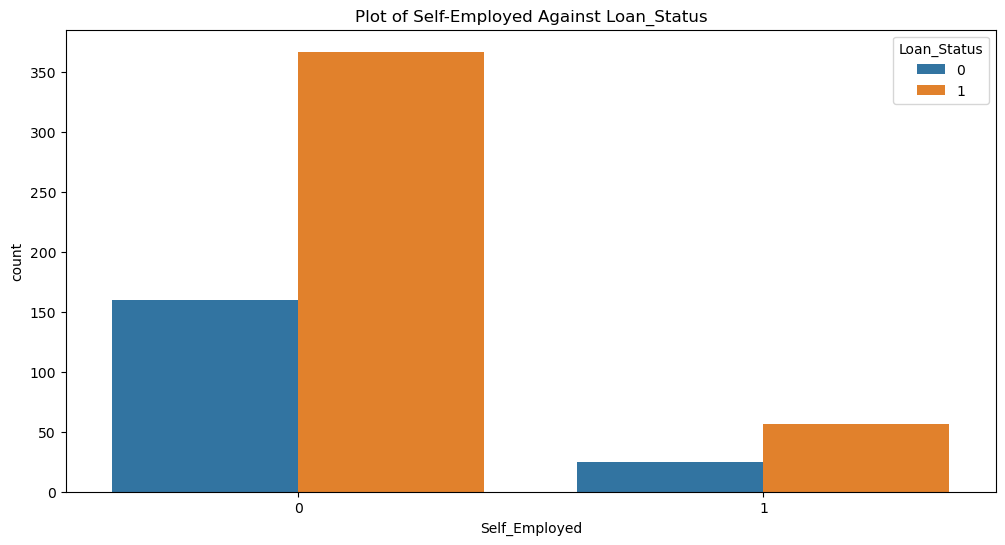

In [29]:
plt.figure(figsize = (12,6))
sns.countplot(x = "Self_Employed", hue = "Loan_Status", data = data1).set(title='Plot of Self-Employed Against Loan_Status');

From the analysis above, we can see that people that aren't self employed had successful loan aplications than those self employed

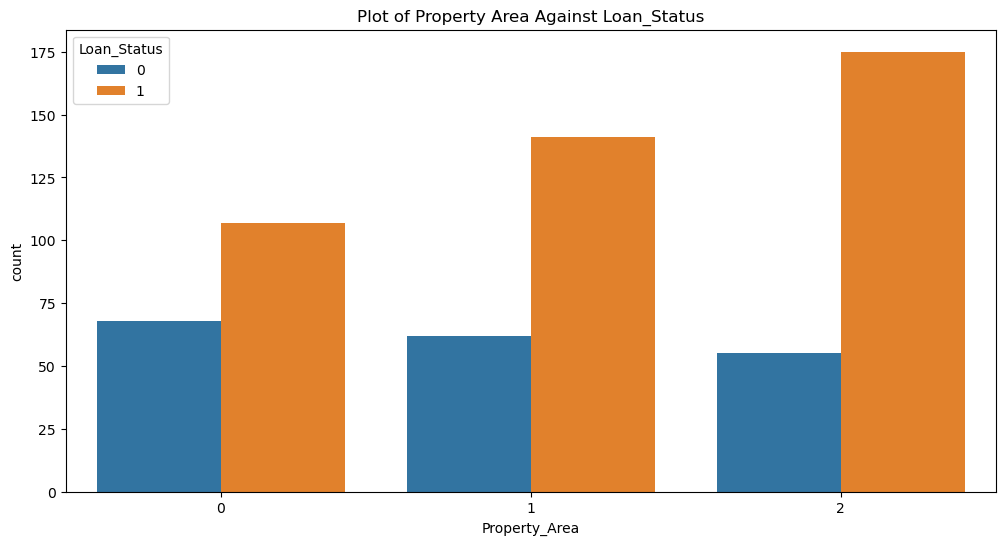

In [30]:
plt.figure(figsize = (12,6))
sns.countplot(x = "Property_Area", hue = "Loan_Status", data = data1).set(title='Plot of Property Area Against Loan_Status');

 From the analysis, we can see we had more successful applications among people with semi-urban property areas than the rest of the property owners

C:\Users\MY PC\AppData\Local\Temp\ipykernel_10772\2151179252.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1[items])
C:\Users\MY PC\AppData\Local\Temp\ipykernel_10772\2151179252.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1[items])


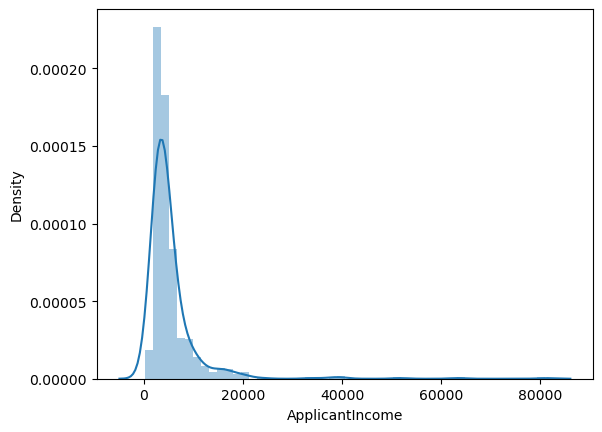

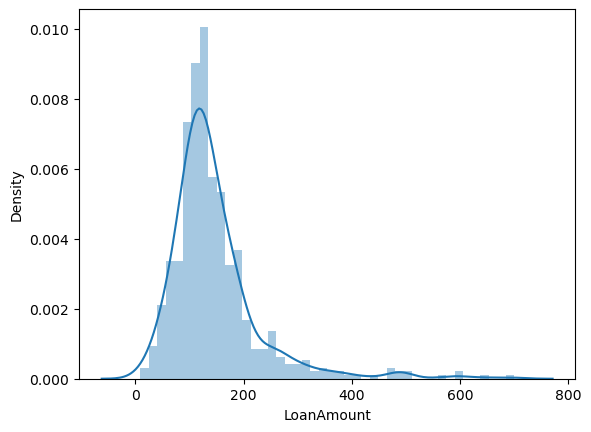

In [31]:
columns = ['ApplicantIncome', 'LoanAmount']
for items in columns:
    plt.figure()  
    sns.distplot(data1[items])

From the both visuals above, we can see that the distribution of Applicant's income is concentrated between 150 and 10000 while the populous loan amounts are between 0 and 200. Also our histogram shows the distribution is right-skewed

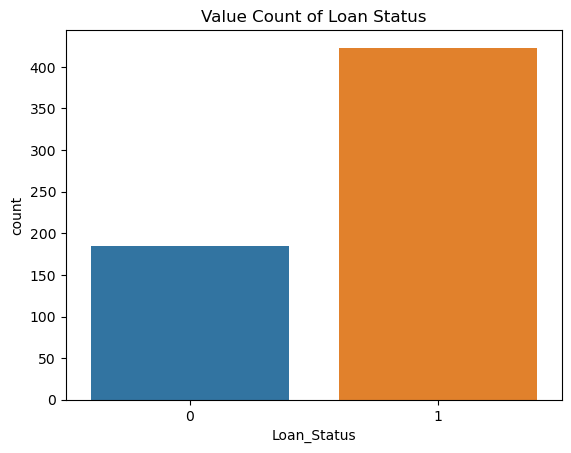

From our observation above, we have more successful loan applications than the unsuccessful ones which shows extreme data inbalance for modelling

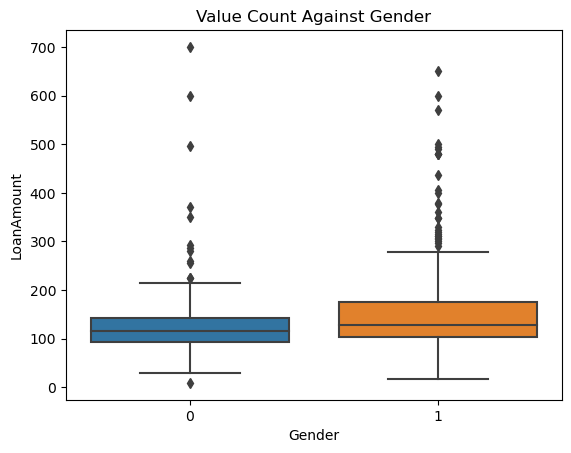

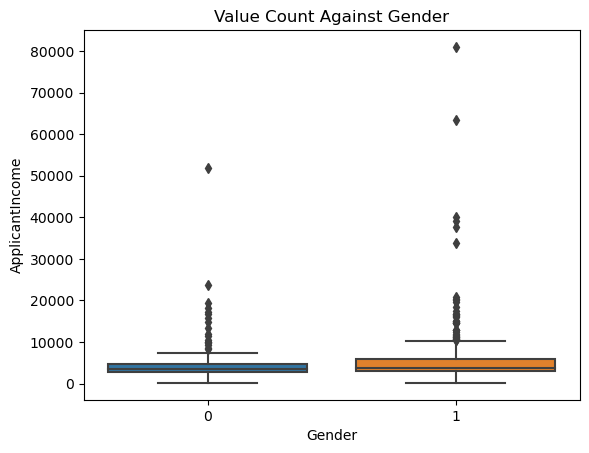

From our first boxplot above, we can see that 1(men) who had applied to the company requested for loans more between 110 and 180 while 2(women) were more concentrated between 100 and 150. This could be attributed to the fact that there more male applicants than women in the dataset. There were also a few outliers in the dataset.

Also in the first plot, the median amount is slightly higher for men (1) when compared to woemn (2) while they both seem similar in the second box plot.

In our second boxplot, we had more 1(men) as well earning more than 2(women) and a few outliers.

In [34]:
# conduct a bivariate analysis to understand the relationship between different columns using seasborn's pairplot

# First by assigning a new dataset called 'snsdata' and 'snsdata2' containing gender and loan_status filters respectively

snsdata1 = data1[['Gender','LoanAmount','ApplicantIncome','Property_Area','Loan_Status']]
snsdata2 = data1[['LoanAmount','ApplicantIncome','Property_Area','Loan_Status']]

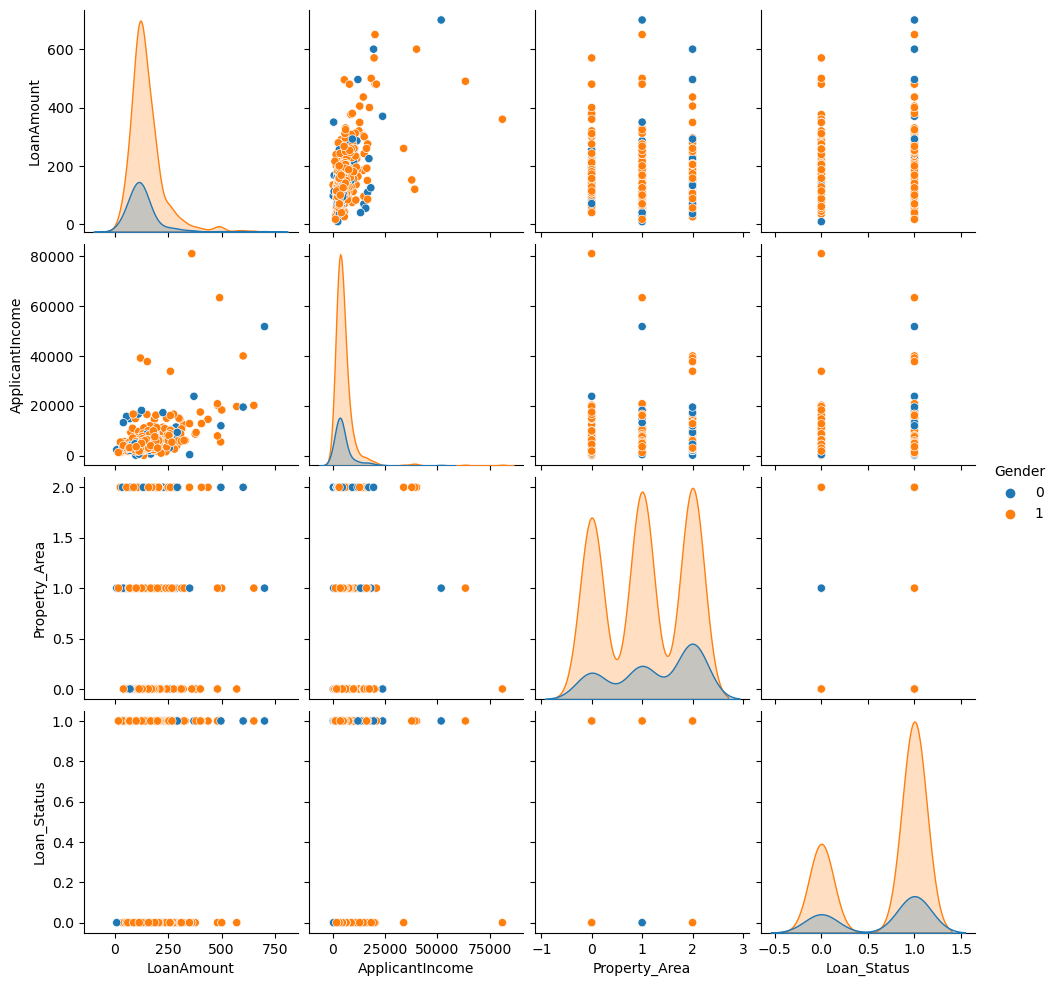

In [35]:
# Visualizing the relationships using Gender as a filter

sns.pairplot(data = snsdata1, hue = 'Gender');

 Observations from the pairplot above;
 
 1. We had greater concentration of both men and women earning around 25000 applying for loan amounts between 1 and 400.
 2. More rural property owners applied for loans between 1 and 400 while a female in urban area applied for the highest amount among property owners.
 3. There were more successful loan amounts between 1 and 400 which attributes to point 1 that more people applied for loans in that amount region.
 4. There was a greater concentration of female semi-urban property owners earning around 25000.
 5. There were more applications from semi-urban owners, followed by urban property owners, and finally rural property owners.
 6. There were more successful loans for men than women owing to the larger applications by men than women.
 7. More unsucccesful loan applications amongst urban property owners was found in women than men.

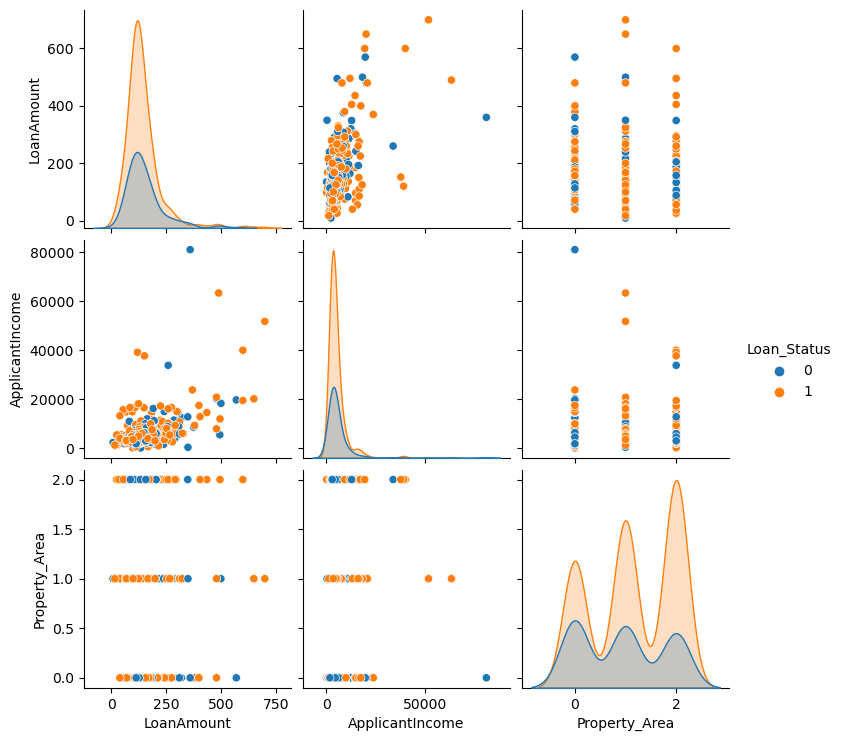

In [36]:
# Visualizing the relationships using Loan_Status as a filter

sns.pairplot(data = snsdata2, hue = 'Loan_Status');

Observations from the plot above;

1. There are more successful and unsuccessful applications between 1 and 400.
2. There are more successful loan applications for urban property owners who applied for less than 500.
3. There are more successful loan applications for urban property owners who earn less than 40000.
4. There were more successful applications in semi-urban, followed by urban and then rural property_owners.
5. There were more unsuccessful applications in rural, followed by urban and then semi-urban property_owners.

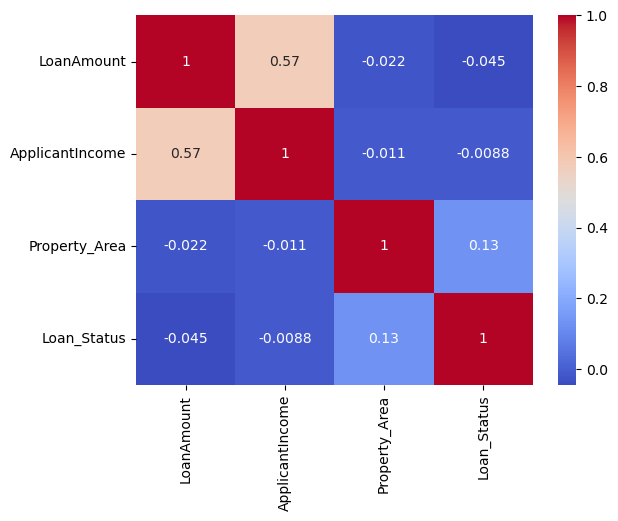

In [37]:
# Visualizing the correlation of snsdata2 better understand how each feature affects the other.

sns.heatmap(snsdata2.corr(), annot = True, cmap = 'coolwarm');

From the heatmap above, we can see a strong positive correlation between ApplicantIncome and LoanAmount. ie higher the applicant's income, the likelihood they might apply for a higher loan amount.

Also, there were several negative correlations but focus would be on that between LoanAmount and Property_Area. 

### 4. ML Modelling

 Here, I would be building a classification model to help understand the underlying patterns for successful and failed loan statuses by
 
 1. Changing the data to ordinal data
 2. Calling the model
 3. Splitting the training data.
 4. Evaluating the model performance.
 5. Tuning the hyperparameters to see if we can improve the performance.

When I initially tried running the scaler function in 2 lines below, I encountered an error due to object type of the column "dependents". So I created a function to change all object data types to ordinal types in data1.

In [38]:
cols = data1.select_dtypes(['object']).columns


def ordinal_mapper(data, var):
    ordinal_map = {k:i for i, k in enumerate(data[var].unique(),0)}
    data[var] = data[var].map(ordinal_map)
    
    
for var in cols:
    ordinal_mapper(data1, var)

In [39]:
# Using our "data1
from sklearn.model_selection import train_test_split

X = data1.drop('Loan_Status', axis = 1)
y = data1['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42 )


In [40]:
# We would need to scale our data since the numeric values are not consistent across features

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

One of the challenges experienced by ML professionals is the choice of model for each task. So i had to research to find if there was a way to test out a lot of models showing their performance interms of evaluation and I discovered LazyPredict python module.

I implemented lazypredict library to show me which models would best work with my data and show me the F1, AUC and accuracy score. This was to save me time for testing all models and also pick one model i could tune the parameters for improved efficiency.


**Reference:**
Lazypredict (2022) PyPI. Available at: https://pypi.org/project/lazypredict/ (Accessed: December 26, 2022). 

In [41]:
# Installed the lazypredict library

# pip install lazypredict

In [42]:
### Initiated the library

from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose = 0, ignore_warnings = True, custom_metric = None)

models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████| 29/29 [00:02<00:00,  9.70it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
SVC                                0.76               0.72     0.72      0.75   
NuSVC                              0.76               0.72     0.72      0.75   
NearestCentroid                    0.74               0.71     0.71      0.74   
BernoulliNB                        0.76               0.71     0.71      0.75   
LinearSVC                          0.75               0.71     0.71      0.74   
LinearDiscriminantAnalysis         0.75               0.71     0.71      0.74   
RidgeClassifier                    0.75               0.71     0.71      0.74   
AdaBoostClassifier                 0.75               0.70     0.70      0.74   
RidgeClassifierCV                  0.75               0.70     0.70      0.73   
GaussianNB                         0.72               0.69     0.69      0.72   
ExtraTreesClassifier        

From the output above using LazyPredict Python library, our best performing model in terms of **accuracy** and considering evaluation metrics such as **AUC** , **F1 Score**, and **Time taken** to implement is the **"Support Vector Classifier"**.

It had an accuracy score of 76%, AUC of 72% and F1 Score of 75%

Since our data works best with SVC, we would go ahead to implement the model and tune the hyperparameters for improved performance.

In [43]:
# Import all required metrics and parameters for SVC

from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Initiate the first instance of the model
svc = SVC()

print(svc)

SVC()


### 5. Model Performance Evaluation

At this stage, we would be analyzing the performance of the model with reference to some metrics.

In [ ]:
# Fit the model into our training data
svc.fit(X_train, y_train)

# Check for the accuracy score performance of the model.
svc_score = svc.score(X_train, y_train)

print(f" The SVC score is {(round(svc_score * 100))}%")

In [45]:
# We can then go ahead to predict using our test data

y_predict = svc.predict(X_test);

y_predict

array([0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1])

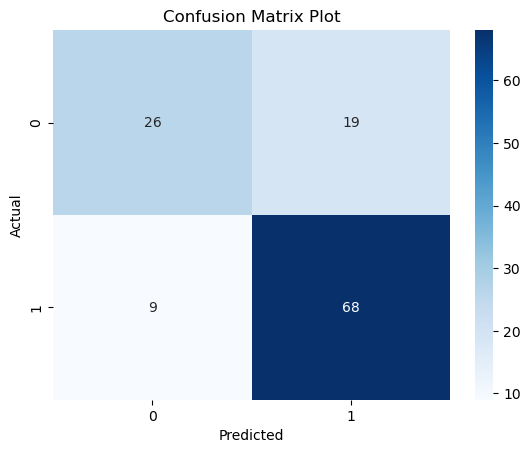

In [46]:
# Plotting Confusion matrix

cm = confusion_matrix(y_test, y_predict);

sns.heatmap(cm,cmap = "Blues", annot = True, 
            xticklabels = [0,1], yticklabels = [0,1]).set(title = "Confusion Matrix Plot");
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

From the Confusion matrix above, we can see that,

1. We have 68 True Positives (TP) that shows that the model accurately predicted that 68 test data were successful.
2. We have 26 True Negatives (TN) that shows that the model accurately predicted that 26 test data weren't successful.
3. We have 19 False positives (FP) that shows that the model predicted successful whereas they weren't successful on the test data.
4. We have 9 False Negatives (FN) that shows that the model predicted unsuccessful whereas they were successful on the test data.

In [47]:
# Plotting Classification Report

class_report = classification_report(y_test, y_predict);

class_report

'              precision    recall  f1-score   support\n\n           0       0.74      0.58      0.65        45\n           1       0.78      0.88      0.83        77\n\n    accuracy                           0.77       122\n   macro avg       0.76      0.73      0.74       122\nweighted avg       0.77      0.77      0.76       122\n'

In [48]:
# Viewing accuracy score

print(accuracy_score(y_test, y_predict))

0.7704918032786885


In [49]:
# Viewing precision score

print(precision_score(y_test, y_predict))

0.7816091954022989


In [50]:
# Viewing the recall score

print(recall_score(y_test, y_predict))

0.8831168831168831


### 6. Tuning Hyperparameters

There are certain parameters that can be tuned for an SVC model in order to improve the performance. They include:

1. C:      Used to tune the regularization strength of the model. Has to be positive
2. Kernel: Used to identify what kernel needs to be implemented. By default, it uses rbf; However, there are other kernels like linear, poly, precomputed, and sigmoid.
3. Degree: If the choice of kernel is poly, the degree comes into usage for the model.
4. Gamma: Used as the kernel coefficient when training models.

To optimize and make the tuning easier, we would use the GridSearchCV and RandomizedSearchCV modules to iterate through a list of given parameters and return the best performing SVC model for us with respect to the best combination of parameters. From there, we can choose our best model.


**Reference**
Sklearn.svm.SVC (no date) scikit. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html (Accessed: December 26, 2022). 

**GridSearchCV**

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C':[0.1,1,100,1000], 
              'kernel':['rbf','poly','sigmoid','linear'],
              'degree':[1,2,3,4,5,6],
              'gamma':[0.00001, 0.0001, 0.001, 0.01, 1]}

grid_model = GridSearchCV(SVC(), param_grid)

grid_model.fit(X_train, y_train)

In [ ]:
print(f" The best parameter combinations are {grid_model.best_params_} on the training dataset")
print(f" The accuracy score using the tuned GridSearchCV model is {(round(grid_model.score(X_train, y_train)*100))}% on the training data")

In [ ]:
print(f" The accuracy score using the tuned model is {(round(grid_model.score(X_test, y_test)*100))}% on the test data")

**RandomizedSearchCV**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_rand = {'C':[0.1,1,10,100,1000], 
              'kernel':['rbf','poly','sigmoid','linear'],
              'degree':[1,2,3,4,5,6],
              'gamma':[0.00001, 0.0001, 0.001, 0.01, 1],}

rand_model = RandomizedSearchCV(estimator = svc, param_distributions = param_rand, cv = 5)

rand_model.fit(X_train, y_train)

In [ ]:
print(f" The best parameter combinations are {rand_model.best_params_}")
print(f" The best model performance score for RandomizedSearchCV is {round((rand_model.best_score_)*100)}%")

From the model outcomes above, we can see that our best performing models are the default svc models and **"grid_model"** with accuracy of **77%** each.

### 6. Using the Built ML model on Test Data from Assessment

We would be using our developed model to predict on the given test data from the assignment called "data2".

I went ahead to preprocess and transform the data just as I did for the data1 before training.

Below are the cleaning expected to be done:


In [ ]:
# Viewing the test data from the assessment:

data2.head()

In [ ]:
# Change gender column to integer
data2['Gender'] = (data2['Gender'] == 'Male').astype(int)

In [ ]:
# Change married column to integer
data2['Married'] = (data2['Married'] == 'Yes').astype(int)

In [ ]:
# Change education column to integer
data2['Education'] = (data2['Education'] == 'Graduate').astype(int)

In [ ]:
# Change self_employed column to integer
data2['Self_Employed'] = (data2['Self_Employed'] == 'Yes').astype(int)

In [ ]:
# Change property_area column to integer
data2['Property_Area'] = data2['Property_Area'].replace({'Semiurban': 2,
                                                        'Urban': 1,
                                                        'Rural': 0}, regex = True)

In [ ]:
# Replace null values in Dependents to 0
data2['Dependents'] = data2['Dependents'].replace(np.nan, 0)

In [ ]:
# Replace null values in Credit history to 0
data2['Credit_History'] = data2['Credit_History'].replace(np.nan, 0)

In [ ]:
# Replace null values in Loan Amount Term to modal value of the column
data2['Loan_Amount_Term'] = data2['Loan_Amount_Term'].fillna(data1['Loan_Amount_Term'].mode()[0])

In [ ]:
# Drop all null columns in LoanAmount column
data2 = data2.dropna(subset=['LoanAmount'])

In [ ]:
# Drop LoanId column
data2.drop('Loan_ID', axis = 1, inplace = True)

In [ ]:
# Reviewing the test data from the assessment after data preprocessing

data2.head()

In [ ]:
data2.Gender.value_counts()

We would also modify this data to become ordinal by calling the **ordinal_mapper** function I had earlier created. This is to ensure smooth operation with the developed ML model.

In [ ]:
cols2 = data2.select_dtypes(['object']).columns 
    
for var in cols2:
    ordinal_mapper(data2, var)

We can then go ahead to predict using the **grid_model** from our tuned svc from GridSearchCV to identify what applications would be successful or not.

In [ ]:
Prediction = grid_model.predict(data2)

Prediction

We can then merge the predicted outcome on the test data with the original test data to see the individual decision for each application using the code below

In [ ]:
x2 = data2
y2 = pd.DataFrame(Prediction)


data3 = pd.merge(data2, y2, left_index=True, right_index=True)

data3

**Finally, we can export to a csv file and review the decision on each application which saves bank ABC time and cost in deciding the loan eligibility of all loan applications**

In [ ]:
data3.to_csv(r"C:\Users\MY PC\Desktop\cccc.csv", index = False)

 ### 7. Conclusion

I personally feel my model isn't the best because there wasn't sufficient data to train on and improve the accuracy score of the model. There's an ample room for improvement if more data is fed to the model.